# 5. Modelos y regresiones

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

style.use("fivethirtyeight")

## Nota examen

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/matheusfacure/python-causality-handbook/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')

In [3]:
df

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000
...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997


In [4]:
modelo1 = smf.ols('falsexam ~ format_ol', data=df, ).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     8.938
Date:                Tue, 10 Oct 2023   Prob (F-statistic):            0.00301
Time:                        14:58:09   Log-Likelihood:                -1246.9
No. Observations:                 323   AIC:                             2498.
Df Residuals:                     321   BIC:                             2505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.8555      0.762    102.235      0.000      76.357      79.354
format_ol     -4.2203      1.412     -2.990      0.003      -6.998      -1.443
==============================================================================
Omnibus:                      158.169   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.296
Skew:                          -1.858   Prob(JB):                    7.08e-273
Kurtosis:                      11.906   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
modelo1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,77.8555,0.762,102.235,0.000,76.357,79.354
format_ol,-4.2203,1.412,-2.990,0.003,-6.998,-1.443


## Wages

In [6]:
wage = pd.read_csv('https://raw.githubusercontent.com/matheusfacure/python-causality-handbook/master/causal-inference-for-the-brave-and-true/data/wage.csv')
# group age in bins of 10 years and create a categorical variable
wage['age_cat'] = pd.cut(wage['age'], bins=range(28, 41, 3), right=False)

wage

,wage,hours,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,age_cat
0,769,40,2.956212,93,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,"[31, 34)"
1,808,50,2.782539,119,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,"[37, 40)"
2,825,40,3.026504,108,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,"[31, 34)"
3,650,40,2.788093,96,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,"[31, 34)"
4,562,40,2.642622,74,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,"[34, 37)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,2.564949,79,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,"[28, 31)"
931,1202,40,3.402863,102,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,"[31, 34)"
932,538,45,2.481196,77,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,"[28, 31)"
933,873,44,2.987746,109,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,"[28, 31)"


In [7]:
wage.describe()

,wage,hours,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,852.000000,857.000000,741.000000
mean,957.945455,43.929412,3.008540,101.282353,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,2.276995,10.682614,10.217274
std,404.360822,7.224256,0.453401,15.052636,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,1.595613,2.849756,3.300700
min,115.000000,20.000000,0.832909,50.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,669.000000,40.000000,2.713025,92.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000
50%,905.000000,40.000000,3.045712,102.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,12.000000,10.000000
75%,1160.000000,48.000000,3.321261,112.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000
max,3078.000000,80.000000,4.630838,145.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000


In [8]:
wage_m1 = smf.ols('wage ~ age_cat', data=wage).fit()
wage_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     8.806
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           9.25e-06
Time:                        14:58:10   Log-Likelihood:                -6925.3
No. Observations:                 935   AIC:                         1.386e+04
Df Residuals:                     931   BIC:                         1.388e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    858.5179     25.209     34.056      0.000     809.045     907.991
age_cat[T.Interval(31, 34, closed='left')]    94.6979     34.774      2.723      0.007      26.452     162.943
age_cat[T.Interval(34, 37, closed='left')]   171.3576     36.666      4.673      0.000      99.399     243.316
age_cat[T.Interval(37, 40, closed='left')]   155.1561     38.946      3.984      0.000      78.725     231.587
==============================================================================
Omnibus:                      211.683   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.066
Skew:                           1.196   Prob(JB):                    1.43e-112
Kurtosis:                       5.739   Cond. No.                         4.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
wage_m1 = smf.ols('wage ~ C(age)*C(educ)', data=wage).fit()
wage_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     2.948
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.17e-17
Time:                        14:58:10   Log-Likelihood:                -6795.5
No. Observations:                 935   AIC:                         1.379e+04
Df Residuals:                     833   BIC:                         1.429e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    645.5669    135.936      4.749      0.000     378.749     912.385
C(age)[T.29]                 -44.1839     98.109     -0.450      0.653    -236.755     148.387
C(age)[T.30]                -168.5669    339.041     -0.497      0.619    -834.042     496.909
C(age)[T.31]                 -46.7928     88.840     -0.527      0.599    -221.170     127.584
C(age)[T.32]                 150.6331     85.703      1.758      0.079     -17.586     318.852
C(age)[T.33]                 -74.5669    339.041     -0.220      0.826    -740.042     590.909
C(age)[T.34]                 229.4331    225.023      1.020      0.308    -212.246     671.112
C(age)[T.35]                 110.2501     93.622      1.178      0.239     -73.512     294.012
C(age)[T.36]                  59.4331    339.041      0.175      0.861    -606.042     724.909
C(age)[T.37]                 329.4331    339.041      0.972      0.332    -336.042     994.909
C(age)[T.38]                 151.0998    225.023      0.671      0.502    -290.579     592.779
C(educ)[T.10]                 -9.3158    131.433     -0.071      0.944    -267.295     248.663
C(educ)[T.11]                451.4331    339.041      1.331      0.183    -214.042    1116.909
C(educ)[T.12]                212.1722    150.576      1.409      0.159     -83.380     507.725
C(educ)[T.13]                 91.7664    185.895      0.494      0.622    -273.112     456.645
C(educ)[T.14]                288.4331    185.895      1.552      0.121     -76.445     653.312
C(educ)[T.15]                 80.7664    225.023      0.359      0.720    -360.913     522.446
C(educ)[T.16]                324.4331    185.895      1.745      0.081     -40.445     689.312
C(educ)[T.17]                395.0576    128.486      3.075      0.002     142.862     647.253
C(educ)[T.18]                350.0772    127.465      2.746      0.006      99.886     600.268
C(age)[T.29]:C(educ)[T.10]   -52.0672    310.576     -0.168      0.867    -661.671     557.536
C(age)[T.30]:C(educ)[T.10]    92.3158    368.191      0.251      0.802    -630.376     815.007
C(age)[T.31]:C(educ)[T.10]   -69.4583    307.757     -0.226      0.821    -673.528     534.611
C(age)[T.32]:C(educ)[T.10]     6.9158    152.838      0.045      0.964    -293.076     306.908
C(age)[T.33]:C(educ)[T.10]   103.9825    387.442      0.268      0.788    -656.495     864.460
C(age)[T.34]:C(educ)[T.10]  -202.1842    276.959     -0.730      0.466    -745.803     341.435
C(age)[T.35]:C(educ)[T.10]    82.4989    226.008      0.365      0.715    -361.114     526.112
C(age)[T.36]:C(educ)[T.10]   -77.2842    368.191     -0.210      0.834    -799.976     645.407
C(age)[T.37]:C(educ)[T.10]   101.6492    387.442      0.262      0.793    -658.828     862.126
C(age)[T.38]:C(educ)[T.10]     4.3158    26

## Missing woman

In [10]:
df = pd.read_stata('https://raw.githubusercontent.com/alejo-acosta/curso-python-ciee/main/data/jayachandran2017.dta')

<Axes: >

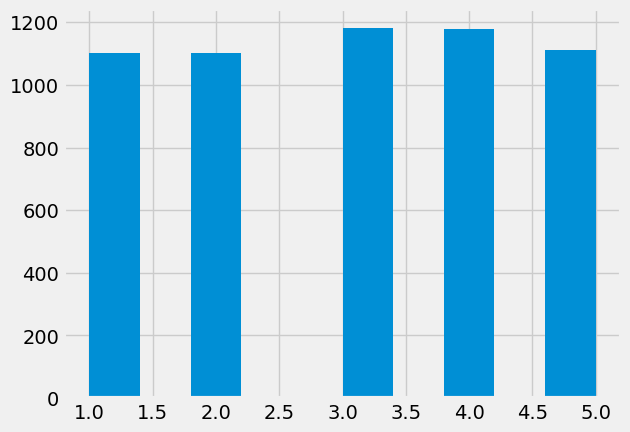

In [11]:
df['Phypo_tfr'].hist()

In [12]:
df

,Sschool_id,Sstudent_gender,Sparent_relation1,Sparent_edu_level1,Sparent_relation2,Sparent_edu_level2,Sparent_relation3,Sparent_edu_level3,Sparent_relation4,Sparent_edu_level4,...,p_secondary,p_grade10,p_grade12up,_IPhypo_tfr_2,_IPhypo_tfr_3,_IPhypo_tfr_4,_IPhypo_tfr_5,_IPideal_tf_2,_IPideal_tf_3,_IPideal_tf_4
0,1101,Female,Father,Primary,Mother,Not literate,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0,1,0,0,1.0,0.0,0.0
1,1101,Female,Father,Class 8 (Middle),Mother,Class 8 (Middle),NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0,1,0,0,1.0,0.0,0.0
2,1101,Female,Father,Class 8 (Middle),Mother,Primary,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0,1,0,0,1.0,0.0,0.0
3,1101,Female,Father,Class 10 (Secondary),Mother,Class 8 (Middle),NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0,1,0,0,1.0,0.0,0.0
4,1101,Male,Father,Class 12 (Higher secondary),Mother,Primary,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0,1,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5670,4514,Female,Father,Class 12 (Higher secondary),Mother,Class 8 (Middle),NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0,0,1,0,1.0,0.0,0.0
5671,4514,Female,Father,Class 12 (Higher secondary),Mother,Class 10 (Secondary),NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0,0,0,0,1.0,0.0,0.0
5672,4514,Female,Father,Not literate,Mother,Class 10 (Secondary),NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1,0,0,0,1.0,0.0,0.0
5673,4514,Female,Father,Class 8 (Middle),Mother,Class 8 (Middle),NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0,0,0,1,1.0,0.0,0.0
